https://www.kaggle.com/code/faeghehghofrani/house-price-forecast-random-forest-knn/input

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import arabic_reshaper

In [383]:
df = pd.read_csv("housing-Raoofi.csv")
df.head()

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_15932\3718050989.py:1: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("housing-Raoofi.csv")


,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
0,153,1393,3,True,True,True,۱ ساعت پیش در تهران، درکه,۱۸٬۳۶۰٬۰۰۰٬۰۰۰ تومان
1,418,1382,4,True,True,True,۱ ساعت پیش در تهران، زعفرانیه,۱۳۰٬۰۰۰٬۰۰۰٬۰۰۰ تومان
2,57,1385,2,False,False,True,۱ ساعت پیش در تهران، جابری,۲٬۶۰۰٬۰۰۰٬۰۰۰ تومان
3,193,1371,3,False,False,True,۱ ساعت پیش در تهران، فرمانیه,۲۳٬۰۰۰٬۰۰۰٬۰۰۰ تومان
4,62,1401,1,True,True,True,۱ ساعت پیش در تهران، دهکده المپیک، بزرگراه همت...,۱٬۴۱۰٬۰۰۰٬۰۰۰ تومان


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94036 entries, 0 to 94035
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Area          94036 non-null  object
 1   Construction  94036 non-null  object
 2   Room          94036 non-null  object
 3   Warehouse     94036 non-null  object
 4   Parking       94036 non-null  object
 5   Elevator      94036 non-null  object
 6   Address       94036 non-null  object
 7   Price         94036 non-null  object
dtypes: object(8)
memory usage: 5.7+ MB


In [387]:
df.duplicated().sum()

990

In [389]:
df.drop_duplicates(inplace = True)

In [391]:
def p(index, Area):
    if isinstance(Area, str) and Area.isdigit():
        df.iloc[index, 0] = int(Area)
        return 0
    if (isinstance(Area, int)):
        df.iloc[index, 0] = Area
        return 0
    else:
        print(f"Cannot convert {Area} to int")
        df.iloc[index, 0] = np.nan

In [393]:
# Process each value and print the index
for idx, value in enumerate(df["Area"]):
    result = p(idx, value)
    if result is None:
        print(f"The problem Causing index is {idx}")

Cannot convert Area to int
The problem Causing index is 51


In [394]:
df["Area"]

0        153
1        418
2         57
3        193
4         62
        ... 
94031    181
94032    121
94033    140
94034    105
94035     51
Name: Area, Length: 93046, dtype: object

In [397]:
df["Area"].isnull().sum()

1

In [399]:
df["Area"] + df["Area"]

0        306
1        836
2        114
3        386
4        124
        ... 
94031    362
94032    242
94033    280
94034    210
94035    102
Name: Area, Length: 93046, dtype: object

In [401]:
def p(index, Construction):
    if isinstance(Construction, str) and Construction.isdigit():
        df.iloc[index, 1] = int(Construction)
        return 0
    elif isinstance(Construction, int):
        df.iloc[index, 1] = Construction
        return 0
    else:
        df.iloc[index, 1] = np.nan

In [403]:
for idx, value in enumerate(df["Construction"]):
    result = p(idx, value)
    if result is None:
        print(f"The problem causing index is {idx}")

The problem causing index is 51


In [404]:
df["Construction"]

0        1393
1        1382
2        1385
3        1371
4        1401
         ... 
94031    1393
94032    1400
94033    1400
94034    1398
94035    1385
Name: Construction, Length: 93046, dtype: object

In [407]:
def p(index, Room):
    if isinstance(Room, str) and Room.isdigit():
        df.iloc[index, 2] = int(Room)
        return 0
    elif isinstance(Room, int):
        df.iloc[index, 2] = Room
        return 0
    else:
        print(f"The problem causing index is {idx}")

In [409]:
for idx, value in enumerate(df["Room"]):
    result = p(idx, value)
    if result is None:
        print(f"The problem ccausing index is {idx}")

The problem causing index is 51
The problem ccausing index is 51


In [411]:
df.iloc[51]

Area                  NaN
Construction          NaN
Room                 Room
Warehouse       Warehouse
Parking           Parking
Elevator         Elevator
Address           Address
Price               Price
Name: 51, dtype: object

In [413]:
# So we will drop index 51
df.drop(index = 51, inplace = True)

In [415]:
df.iloc[51]

Area                                            57
Construction                                  1382
Room                                             2
Warehouse                                    False
Parking                                       True
Elevator                                      True
Address         ۱ ساعت پیش در تهران، سازمان برنامه
Price                          ۵٬۲۰۰٬۰۰۰٬۰۰۰ تومان
Name: 52, dtype: object

In [417]:
for column in df.drop(columns = ["Construction", "Room", "Area", "Address", "Price"]).columns.to_list():
    df[column] = df[column].map({'True': True, 'False': False, 'true': True, 'false': False, True: True, False: False})
    df[column] = df[column].astype(int)

In [419]:
df.isnull().sum()

Area            0
Construction    0
Room            0
Warehouse       0
Parking         0
Elevator        0
Address         0
Price           0
dtype: int64

In [421]:
df[df['Price']=='توافقی']

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
295,80,1399,2,1,1,1,۱ ساعت پیش در تهران، اقدسیه,توافقی
704,72,1401,2,1,1,1,۲ ساعت پیش در تهران، مبارک‌آباد بهشتی,توافقی
874,460,1401,4,1,1,1,۲ ساعت پیش در تهران، الهیه,توافقی
881,935,1400,4,1,1,1,۲ ساعت پیش در تهران، الهیه,توافقی
900,418,1401,4,1,1,1,۲ ساعت پیش در تهران، الهیه,توافقی
...,...,...,...,...,...,...,...,...
88099,120,1400,2,1,1,1,۲ هفته پیش در تهران، سعادت‌آباد,توافقی
88513,100,1401,2,1,1,1,۲ هفته پیش در تهران، چیتگر,توافقی
88624,160,1395,3,1,1,1,۳ روز پیش در تهران، مرزداران,توافقی
91441,360,1400,4,1,1,1,۲ هفته پیش در تهران، پاسداران,توافقی


In [423]:
def clean_price(price):
    if 'تومان' in price:
        return int(price.replace('تومان', '').replace('٬', '').strip())
    return None

In [425]:
df["Price"] = df["Price"].apply(clean_price)

In [427]:
df.isnull().sum()

Area              0
Construction      0
Room              0
Warehouse         0
Parking           0
Elevator          0
Address           0
Price           245
dtype: int64

In [429]:
def clean_Address(address):

    match = re.search(r'پیش در تهران، ([^،]+)(?:، [^،]+)?$', address)
    if match:
        return match.group(1)
    return address

df['Address'] = df['Address'].apply(clean_Address)
df

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
0,153,1393,3,1,1,1,درکه,1.836000e+10
1,418,1382,4,1,1,1,زعفرانیه,1.300000e+11
2,57,1385,2,0,0,1,جابری,2.600000e+09
3,193,1371,3,0,0,1,فرمانیه,2.300000e+10
4,62,1401,1,1,1,1,دهکده المپیک,1.410000e+09
...,...,...,...,...,...,...,...,...
94031,181,1393,3,1,1,1,جردن,1.800000e+10
94032,121,1400,3,1,1,1,اباذر,1.380000e+10
94033,140,1400,3,1,1,1,آبشار تهران,9.860000e+09
94034,105,1398,2,1,1,1,اوقاف,6.430000e+09


In [431]:
df.isnull().sum()

Area              0
Construction      0
Room              0
Warehouse         0
Parking           0
Elevator          0
Address           0
Price           245
dtype: int64

In [433]:
df.dropna(inplace = True)

In [435]:
for column in ["Construction", "Room", "Area"]:
    df[column] = df[column].astype(int)

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92800 entries, 0 to 94035
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          92800 non-null  int32  
 1   Construction  92800 non-null  int32  
 2   Room          92800 non-null  int32  
 3   Warehouse     92800 non-null  int32  
 4   Parking       92800 non-null  int32  
 5   Elevator      92800 non-null  int32  
 6   Address       92800 non-null  object 
 7   Price         92800 non-null  float64
dtypes: float64(1), int32(6), object(1)
memory usage: 4.2+ MB


In [439]:
df["Address"].nunique()

337

In [443]:
df_dummies = pd.get_dummies(df, drop_first = True)
df_dummies

,Area,Construction,Room,Warehouse,Parking,Elevator,Price,Address_آبشار تهران,Address_آجودانیه,Address_آذربایجان,...,Address_کوی هفدهم شهریور,Address_گاندی,Address_گرگان,Address_گلاب دره,Address_گلچین,Address_گمرک,Address_گیشا (کوی نصر),Address_یاخچی‌آباد,Address_یافت‌آباد,Address_یوسف‌آباد
0,153,1393,3,1,1,1,1.836000e+10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,418,1382,4,1,1,1,1.300000e+11,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,57,1385,2,0,0,1,2.600000e+09,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,193,1371,3,0,0,1,2.300000e+10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,62,1401,1,1,1,1,1.410000e+09,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94031,181,1393,3,1,1,1,1.800000e+10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94032,121,1400,3,1,1,1,1.380000e+10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94033,140,1400,3,1,1,1,9.860000e+09,True,False,False,...,False,False,False,False,False,False,False,False,False,False
94034,105,1398,2,1,1,1,6.430000e+09,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [459]:
for column in df.select_dtypes(include = "bool").columns.to_list():
    df_dummies[column] = df_dummies[column].astype(int)

In [449]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [461]:
X = df_dummies.drop("Price", axis = 1)
y = df_dummies["Price"]

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33, test_size = 0.2)
rfr = RandomForestRegressor(n_jobs = -1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [467]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92800 entries, 0 to 94035
Columns: 343 entries, Area to Address_یوسف‌آباد
dtypes: bool(336), float64(1), int32(6)
memory usage: 33.3 MB


In [469]:
from sklearn.metrics import r2_score
y_preds = rfr.predict(X_test)
r2_score(y_test, y_preds)

0.7519357266133011

In [475]:
df_final = df_dummies.copy()

In [481]:
df_final["facilities"] = df_final["Parking"] + df_final["Warehouse"] + df_final["Elevator"]

In [483]:
df_final.drop(columns = ["Parking", "Warehouse", "Elevator"], inplace = True)

In [487]:
X = df_final.drop(columns = ["Price"])
y = df_final["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33, test_size = 0.2)
rfr = RandomForestRegressor(n_jobs = -1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [489]:
y_preds = rfr.predict(X_test)
r2_score(y_test, y_preds)

0.7467275020030066

In [493]:
rfr1 = RandomForestRegressor(n_jobs = -1)

In [505]:
param_grid = {"min_samples_split" : [1, 2,3 ,4, 5],
             "min_samples_leaf" : [2, 3, 4],
             }

In [511]:
from sklearn.model_selection import GridSearchCV, cross_val_score
def training(param_grid, model):
    model_cv = GridSearchCV(estimator = model,param_grid = param_grid, cv = 3, n_jobs = -1)
    model_cv.fit(X_train, y_train)
    model_best = model_cv.best_estimator_
    model_best_params = model_cv.best_params_

    #scores = cross_val_score(estimator = model_best, X = X_train, y = y_train, n_jobs = -1)
    #print(f"Mean of cross validation is {scores.mean()}")
    #print(f"Variance of cross validation is {scores.var()}")
    #print(f"Actual scores are ", scores)
    
    model_best.fit(X_train, y_train)
    y_preds = model_best.predict(X_test)
    score = r2_score(y_test, y_preds)
    print(f"r2_score is {score}")
    print(f"Best parameters are {model_best_params}")
    return model_best

In [513]:
model_best = training(param_grid, rfr1)

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "E:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter

r2_score is 0.7513574617325003
Best parameters are {'min_samples_leaf': 4, 'min_samples_split': 4}


In [517]:
rfr2 = RandomForestRegressor(min_samples_leaf = 1, min_samples_split = 3, n_jobs = -1)
rfr2.fit(X_train, y_train)
y_preds = rfr2.predict(X_test)
r2_score(y_test, y_preds)

0.7452007173939155

In [521]:
ada = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.1)

In [523]:
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100)

In [525]:
r2_score(y_test, ada.predict(X_test))

0.23791486569981402

In [527]:
hgbr = HistGradientBoostingRegressor()
param_grid = {"max_leaf_nodes" : [6, 7, 8, 12, 20]}
hgbr = training(param_grid, hgbr)
y_preds = hgbr.predict(X_test)
r2_score(y_test, y_preds)

r2_score is 0.6681483522311537
Best parameters are {'max_leaf_nodes': 7}


0.6681483522311537

In [528]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [541]:
rfr = RandomForestRegressor(n_jobs = -1)
xgbr = XGBRegressor(tree_method = "gpu_hist", predictor = "gpu_predictor")
lgbm  = LGBMRegressor()
etr = ExtraTreesRegressor()
br = BaggingRegressor(n_jobs = -1)
gbr = GradientBoostingRegressor()
hgbr = HistGradientBoostingRegressor()

In [543]:
model_vrs = [
    ("rfr", rfr),
    ("lgbm", lgbm),
    ("etr", etr),
    ("br", br),
    ("gbr", gbr),
    ("hgbr", hgbr)
]

In [545]:
vr = VotingRegressor(estimators = model_vrs, n_jobs = -1)
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('rfr', RandomForestRegressor(n_jobs=-1)),
                            ('lgbm', LGBMRegressor()),
                            ('etr', ExtraTreesRegressor()),
                            ('br', BaggingRegressor(n_jobs=-1)),
                            ('gbr', GradientBoostingRegressor()),
                            ('hgbr', HistGradientBoostingRegressor())],
                n_jobs=-1)

In [549]:
r2_score(y_test, vr.predict(X_test))

0.7651763837928112

In [553]:
import optuna

In [563]:
st = StandardScaler()
X_train_transformed = st.fit_transform(X_train)
X_test_transformed = st.transform(X_test)

In [573]:
def objective(trial):
    
    # Define hyperparameters to tune
    param = {
        "n_jobs" : -1,
        'tree_method': 'gpu_hist',  # Use GPU acceleration
        'predictor': 'gpu_predictor',
        'gpu_id': 0,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1e-2),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1e-2),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    
    # Create the model
    model = XGBRegressor(**param)
    
    # Perform cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    return score.mean()


In [575]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

# Print and return the best hyperparameters
best_params = study.best_params
print('Best hyperparameters: ', best_params)

[I 2024-07-26 21:12:12,229] A new study created in memory with name: no-name-3809505c-e609-44f4-975a-d792b2592d17
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_15932\1490030705.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_15932\1490030705.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1e-2),
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_15932\1490030705.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in 

Best hyperparameters:  {'n_estimators': 665, 'max_depth': 6, 'learning_rate': 0.1072108101813054, 'subsample': 0.732366987954133, 'colsample_bytree': 0.7648713278757389, 'gamma': 1.946076117782421, 'reg_alpha': 0.00104747831310353, 'reg_lambda': 1.9656015801236665e-07, 'min_child_weight': 10}


In [571]:
xgbr = XGBRegressor(**best_params)
xgbr.fit(X_train_transformed, y_train)
r2_score(y_test, xgbr.predict(X_test_transformed))

0.6776232725516853

In [577]:
from sklearn.neighbors import KNeighborsRegressor
param_knr = {'n_neighbors': [5, 10, 15, 20]}
model = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = param_knr, cv = 3, n_jobs = -1)
model.fit(X_train_transformed, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20]})

In [579]:
best_model = model.best_estimator_
r2_score(y_test, best_model.fit(X_train_transformed, y_train).predict(X_test))

E:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


-524.9628499054261

In [581]:
X_train_transformed

array([[ 0.08910005,  1.03810235,  1.00958335, ..., -0.03745434,
        -0.09784448,  0.52700255],
       [ 0.07508668,  1.03810235,  1.00958335, ..., -0.03745434,
        -0.09784448,  0.52700255],
       [ 0.27828056,  0.90909028,  1.00958335, ..., -0.03745434,
        -0.09784448,  0.52700255],
       ...,
       [ 0.89136555,  0.90909028,  2.31435787, ..., -0.03745434,
        -0.09784448,  0.52700255],
       [ 0.05056328, -0.89707881,  1.00958335, ..., -0.03745434,
        -0.09784448, -0.89804459],
       [-0.11409383, -0.63905465, -0.29519118, ..., -0.03745434,
        -0.09784448, -0.89804459]])

In [583]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

LinearRegression()

In [585]:
r2_score(y_test, lr.predict(X_test_transformed))

-2.5143086779507917e+18

In [ ]:
from sklearn.manifold import TSNE
tsne_results = {}
iterations = [1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
perplexities = [35, 40, 45, 50]
for iteration in iterations:
    for perplexity in perplexities:
        tsne = TSNE(n_components = 2, perplexity = perplexity, n_iter = iteration, n_jobs = -1)
        X_tsne = tsne.fit_transform(X_train)
        tsne_results[(perplexity, iteration)] = X_tsne

In [593]:
import sklearn
sklearn.__version__

'1.4.2'

TypeError: list indices must be integers or slices, not tuple

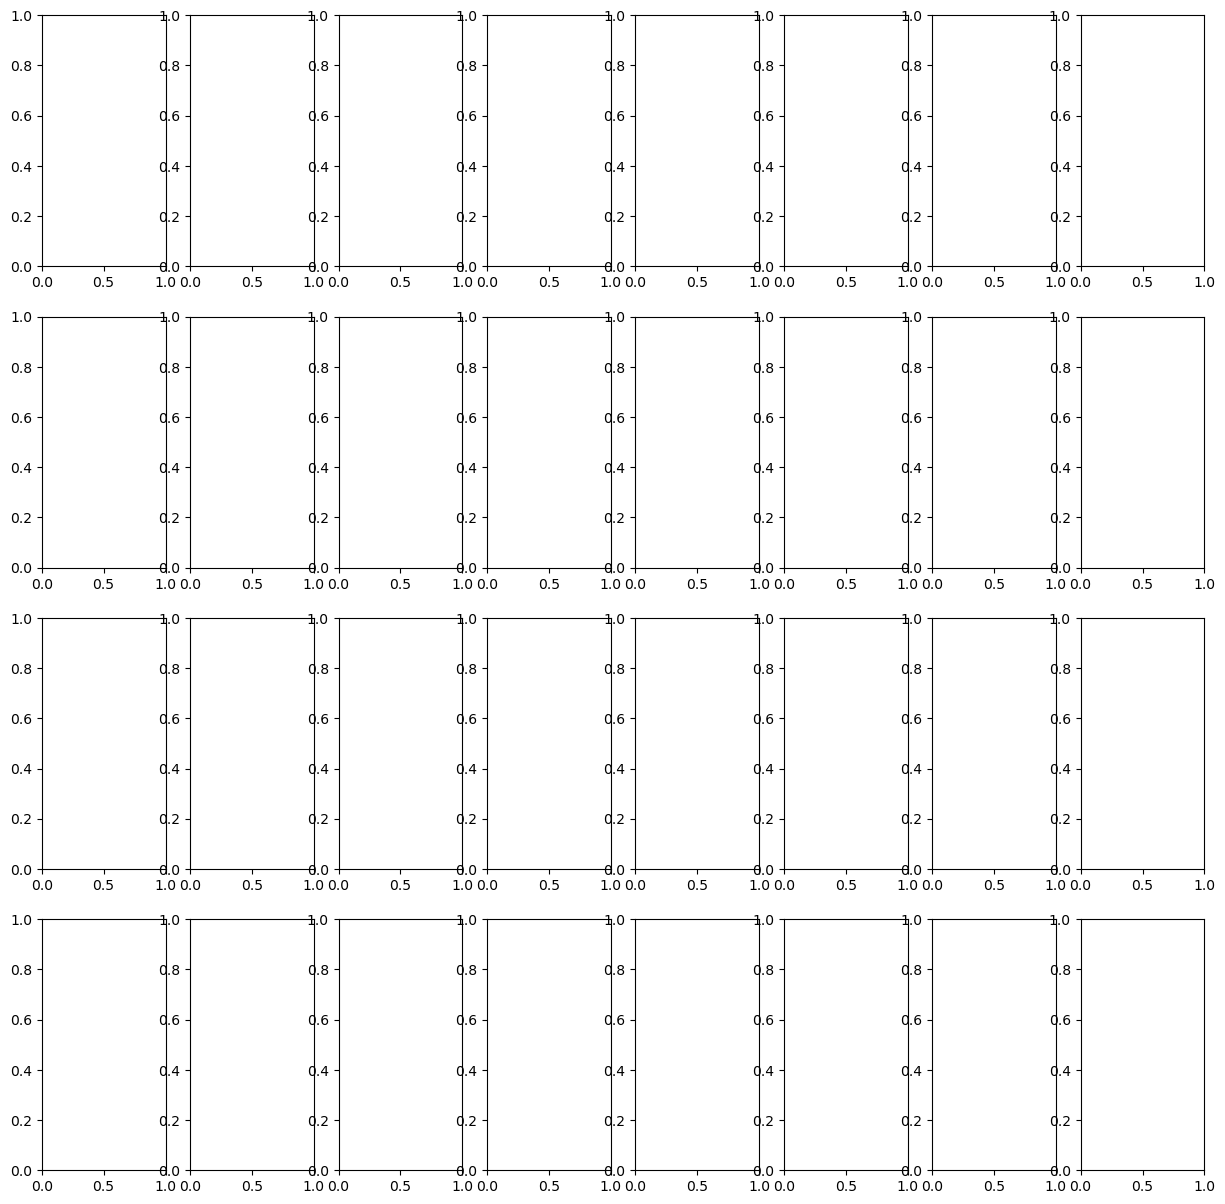

In [605]:
fig, axes = plt.subplots(len(perplexities), len(iterations), figsize=(15, 15))

for i, iteration in enumerate(iterations):
    for j, perplexity in enumerate(perplexities):
        ax = axes[i, j]
        X_tsne = tsne_results[(perplexity, iteration)]
        sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], palette='viridis', ax=ax)
        ax.set_title(f'Perplexity: {perplexity}, LR: {iteration}')
        ax.set_xlabel('')
        ax.set_ylabel('')
        
plt.tight_layout()
plt.show()
